In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/pre_processing_data/normalizaded_matches.csv", index_col=0)
df = matches_info_df.copy()
matches_info_df

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,B365D_classification_0,B365D_classification_1,B365D_classification_2,B365D_classification_3,B365D_classification_4,B365A_classification_0,B365A_classification_1,B365A_classification_2,B365A_classification_3,B365A_classification_4
0,0.090909,0.473684,-0.953510,-0.871429,-0.680040,0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.272727,-0.263158,-0.741112,-0.928571,-0.953862,0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.272727,-0.368421,-0.923428,-0.914286,-0.830491,-0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.454545,-0.894737,-0.868733,-0.942857,-0.905717,-0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.636364,-1.000000,-0.504102,-0.857143,-0.975426,0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,-0.978122,-0.571429,-0.504514,0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
376,-0.454545,0.473684,-0.979945,-0.500000,-0.504514,-0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
377,-0.090909,-0.578947,-0.965360,-0.750000,-0.629890,-1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
378,-0.090909,0.684211,-0.896080,-0.928571,-0.880642,0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [109]:
matches_info_df = matches_info_df.drop(['B365A', 'B365H', 'B365H_log', 'B365H_classification_0', 'B365A_classification_0', 'win_home_prob', 'lay_away_prob', 'home_team_shots_on_target_dirty'], axis=1)

In [110]:
# Calcular a correlação de Spearman de todas as colunas com 'B365H' win_home_prob lay_away_prob
correlation_matrix = matches_info_df.corr(method='pearson')
b365h_corr = correlation_matrix['home_team_shots']

# Filtrar correlações acima de 0.35 ou abaixo de -0.35
b365h_filtered_corr = b365h_corr[b365h_corr.abs() > 0.35]
b365h_filtered_corr

result                                0.373638
away_performance_rank                -0.378355
home_team_goal_count                  0.397625
home_team_shots                       1.000000
home_team_shots_on_target_original    0.761304
home_team_corner_count                0.535195
away_team_shots                      -0.392182
away_team_corner_count               -0.428405
home_season_shots                     0.409876
home_season_shots_on_target           0.365720
home_team_possession                  0.529764
B365A_log                             0.491181
Name: home_team_shots, dtype: float64

In [111]:
# Criar uma lista com os nomes das colunas que têm uma boa correlação com 'B365H'
columns_to_keep = b365h_filtered_corr.index.tolist()

# Criar um novo DataFrame apenas com essas colunas
filtered_regression_b365h_df = matches_info_df[columns_to_keep]

filtered_regression_b365h_df

,result,away_performance_rank,home_team_goal_count,home_team_shots,home_team_shots_on_target_original,home_team_corner_count,away_team_shots,away_team_corner_count,home_season_shots,home_season_shots_on_target,home_team_possession,B365A_log
0,0.090909,0.157895,-0.333333,-0.384615,-0.066667,-0.764706,-0.294118,-0.285714,-0.043478,0.541667,-0.096774,0.056359
1,-0.272727,0.684211,-0.666667,-0.153846,-0.600000,-0.647059,0.294118,-0.285714,-0.362319,-0.437500,-0.290323,-0.666900
2,0.272727,-0.789474,-0.333333,-0.153846,-0.333333,-0.176471,-0.411765,-0.428571,-0.681159,-0.395833,0.419355,-0.227414
3,-0.454545,-0.157895,-1.000000,-0.153846,-0.066667,-0.411765,0.058824,-0.285714,-0.217391,-0.375000,0.548387,-0.452657
4,-0.636364,0.789474,-1.000000,-0.538462,-0.733333,-0.764706,-0.294118,-0.285714,-1.000000,-0.875000,-0.387097,-0.798399
...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.368421,-0.333333,-0.153846,-0.200000,-0.529412,-0.411765,-0.857143,0.420290,0.541667,0.322581,0.269118
376,-0.454545,-0.789474,-1.000000,0.615385,0.466667,0.294118,0.058824,-0.714286,-0.043478,0.541667,0.774194,0.269118
377,-0.090909,-1.000000,-0.666667,-0.461538,-0.466667,-0.529412,-0.294118,-0.571429,-0.449275,-0.229167,0.129032,0.125889
378,-0.090909,0.263158,-0.333333,-0.307692,-0.466667,-0.176471,0.294118,-0.428571,-0.028986,0.104167,0.193548,-0.367024


In [112]:
#filtered_regression_b365h_df = filtered_regression_b365h_df[['home_team_shots', 'home_team_shots_on_target_original', 'home_team_corner_count', 'B365A_log', 'result']]
filtered_regression_b365h_df

,result,away_performance_rank,home_team_goal_count,home_team_shots,home_team_shots_on_target_original,home_team_corner_count,away_team_shots,away_team_corner_count,home_season_shots,home_season_shots_on_target,home_team_possession,B365A_log
0,0.090909,0.157895,-0.333333,-0.384615,-0.066667,-0.764706,-0.294118,-0.285714,-0.043478,0.541667,-0.096774,0.056359
1,-0.272727,0.684211,-0.666667,-0.153846,-0.600000,-0.647059,0.294118,-0.285714,-0.362319,-0.437500,-0.290323,-0.666900
2,0.272727,-0.789474,-0.333333,-0.153846,-0.333333,-0.176471,-0.411765,-0.428571,-0.681159,-0.395833,0.419355,-0.227414
3,-0.454545,-0.157895,-1.000000,-0.153846,-0.066667,-0.411765,0.058824,-0.285714,-0.217391,-0.375000,0.548387,-0.452657
4,-0.636364,0.789474,-1.000000,-0.538462,-0.733333,-0.764706,-0.294118,-0.285714,-1.000000,-0.875000,-0.387097,-0.798399
...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.368421,-0.333333,-0.153846,-0.200000,-0.529412,-0.411765,-0.857143,0.420290,0.541667,0.322581,0.269118
376,-0.454545,-0.789474,-1.000000,0.615385,0.466667,0.294118,0.058824,-0.714286,-0.043478,0.541667,0.774194,0.269118
377,-0.090909,-1.000000,-0.666667,-0.461538,-0.466667,-0.529412,-0.294118,-0.571429,-0.449275,-0.229167,0.129032,0.125889
378,-0.090909,0.263158,-0.333333,-0.307692,-0.466667,-0.176471,0.294118,-0.428571,-0.028986,0.104167,0.193548,-0.367024


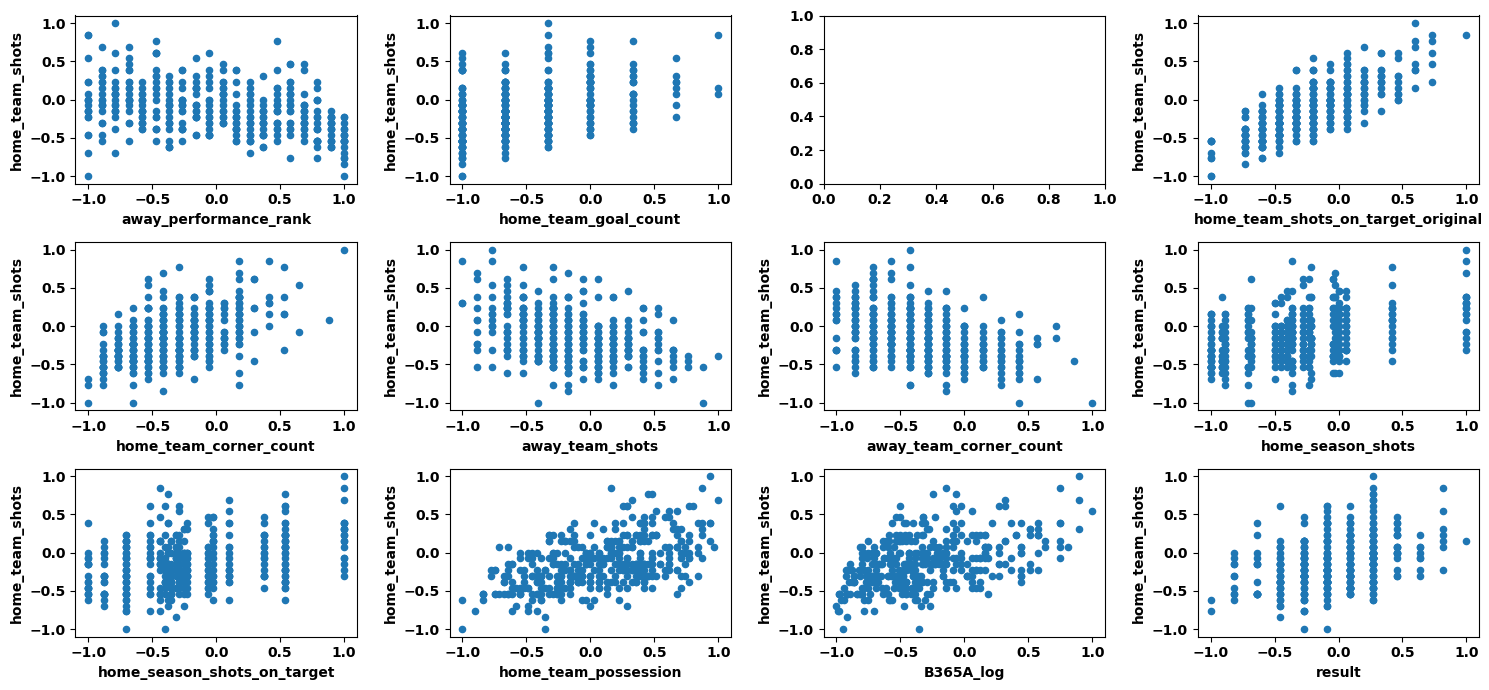

In [113]:
# Supondo que filtered_regression_b365h_df seja o seu DataFrame
figs, axes = plt.subplots(3, 4, figsize=(15, 7))
axes = axes.flatten()  # Achatar o array 2D de eixos para facilitar a indexação

for i, column in enumerate(filtered_regression_b365h_df.columns):
    if not (column == 'home_team_shots'):
        filtered_regression_b365h_df.plot.scatter(x=column, y='home_team_shots', ax=axes[i-1])

plt.tight_layout()
plt.show()

In [114]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Supondo que X e y sejam suas variáveis preditoras e alvo
X = filtered_regression_b365h_df.drop(columns=['home_team_shots']).values
y = filtered_regression_b365h_df['home_team_shots'].values

# Transformação polinomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Ajustar o modelo de regressão
model = LinearRegression()
model.fit(X_poly, y)

# Avaliar o modelo
print("Coeficientes do modelo:", model.coef_)
print("Intercepto do modelo:", model.intercept_)
print("R^2 do modelo:", model.score(X_poly, y))


Coeficientes do modelo: [ 1.98868464e-15 -2.45787078e-01 -1.84400972e-01  1.26863205e-01
  5.52151295e-01  9.84019077e-02 -1.77210046e-01  2.04155177e-01
  3.82883621e-01 -1.05785769e-01  2.42328134e-01 -3.82002052e-01
  2.17206260e-01  3.12135049e-01 -4.85645395e-01 -4.26778321e-02
 -4.47425454e-02 -5.73905966e-02 -2.51028041e-01 -1.60912669e-01
 -3.77328565e-01 -1.51981516e-01  7.32463310e-01 -7.90803296e-02
 -2.43209006e-01  3.82897593e-02 -2.23636050e-02 -1.17815158e-01
  2.49802512e-01  7.77915386e-02  4.35567937e-02  1.58895416e-02
 -2.83743941e-01  2.47782606e-01 -1.80932508e-01 -8.06088962e-02
  8.29667368e-03  2.34704199e-01  3.36365940e-02  3.76451894e-01
  2.42559677e-01 -6.46542535e-01  6.71765173e-02  2.04710627e-01
 -1.21387415e-01  4.93901072e-03  1.79788112e-01 -2.34455586e-01
 -3.35622109e-02  3.12204600e-02 -1.03459597e-01 -1.02122341e-01
  1.37362769e-01  8.27149121e-02 -1.29797793e-02  4.74794996e-02
 -4.16180518e-02 -8.25830991e-02 -8.24928286e-02  1.67873756e-03
 

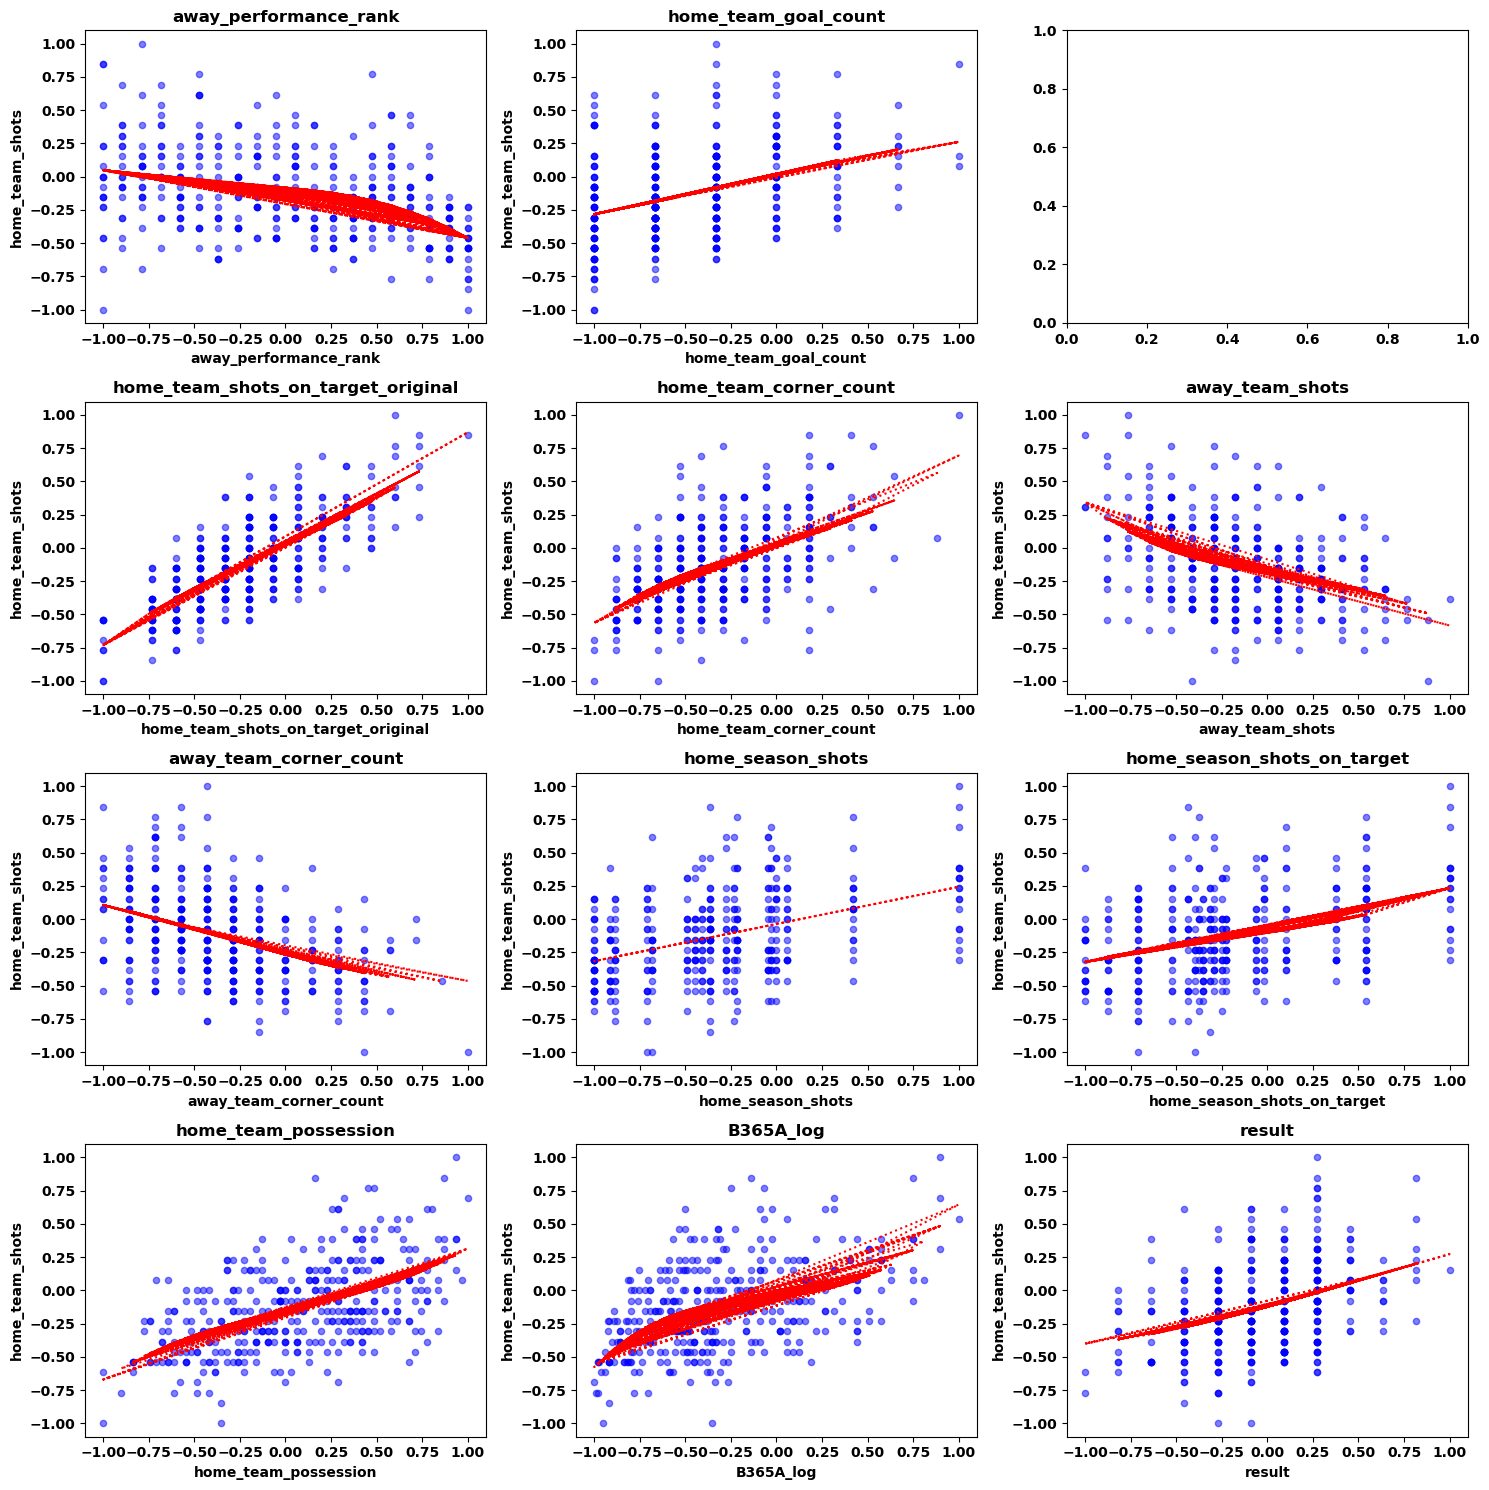

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Supondo que filtered_regression_b365h_df seja o seu DataFrame
figs, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()  # Achatar o array 2D de eixos para facilitar a indexação

# Iterar sobre cada coluna, ajustar um modelo polinomial e plotar as previsões
for i, column in enumerate(filtered_regression_b365h_df.columns):
    if not (column == 'home_team_shots'):
        ax = axes[i-1]
        # Plotando os dados originais
        filtered_regression_b365h_df.plot.scatter(x=column, y='home_team_shots', ax=ax, color='blue', alpha=0.5)
        ax.set_title(column)

        # Ajustar um modelo de regressão polinomial para cada coluna individualmente
        X_col = filtered_regression_b365h_df[[column]].values
        poly = PolynomialFeatures(degree=3)
        X_col_poly = poly.fit_transform(X_col)

        model = LinearRegression()
        model.fit(X_col_poly, filtered_regression_b365h_df['home_team_shots'].values)

        # Prever e plotar as previsões do modelo polinomial
        y_col_pred = model.predict(X_col_poly)
        ax.plot(filtered_regression_b365h_df[column], y_col_pred, color='red', linestyle=':')

plt.tight_layout()
plt.show()


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Variável dependente (target)
y = filtered_regression_b365h_df['home_team_shots']

# Variáveis independentes (features)
X = filtered_regression_b365h_df.drop(['home_team_shots'], axis=1)


In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separar as variáveis dependente e independentes
X = filtered_regression_b365h_df.drop(['home_team_shots'], axis=1)
y = filtered_regression_b365h_df['home_team_shots']

# Dividir os dados em treinamento e conjunto intermediário (70% treinamento, 30% intermediário)
X_train, X_intermediate, y_train, y_intermediate = train_test_split(X, y, test_size=0.30, random_state=42)

# Dividir o conjunto intermediário em validação (50% de 30% -> 15%) e teste (50% de 30% -> 15%)
X_val, X_test, y_val, y_test = train_test_split(X_intermediate, y_intermediate, test_size=0.5, random_state=42)

# Exibir o tamanho de cada conjunto
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} linhas")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]} linhas")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} linhas")


Tamanho do conjunto de treinamento: 266 linhas
Tamanho do conjunto de validação: 57 linhas
Tamanho do conjunto de teste: 57 linhas


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instanciar o modelo de Regressão Linear
linear_regression_model = LinearRegression()

# Treinar o modelo
linear_regression_model.fit(X_train, y_train)

# Fazer predições no conjunto de validação
y_val_pred = linear_regression_model.predict(X_val)

# Avaliar o modelo usando Mean Squared Error
mse = mean_squared_error(y_val, y_val_pred)
print(f"MSE no conjunto de validação: {mse}")

MSE no conjunto de validação: 0.040285570068344156


In [119]:
import mlflow
import mlflow.sklearn

# Configurar o MLFlow para salvar os logs localmente
mlflow.set_tracking_uri("file:///mnt/mlruns")
mlflow.set_experiment("Regressão de Odds de Futebol")

# Função para treinamento e registro do modelo com MLFlow
def train_and_log_model(model, X_train, y_train, X_val, y_val, model_name):
    with mlflow.start_run():
        # Treinar o modelo
        model.fit(X_train, y_train)
        
        # Fazer predições no conjunto de validação
        predictions = model.predict(X_val)
        
        # Calcular a métrica de avaliação (Mean Squared Error)
        mse = mean_squared_error(y_val, predictions)
        
        # Logar a métrica no MLFlow
        mlflow.log_metric("mse", mse)
        
        # Logar os parâmetros do modelo no MLFlow
        mlflow.log_params(model.get_params())
        
        # Logar o modelo no MLFlow
        mlflow.sklearn.log_model(model, model_name)
        
        return mse

# Chamar a função para treinar e logar o modelo de regressão linear
mse = train_and_log_model(linear_regression_model, X_train, y_train, X_val, y_val, "LinearRegression")
print(f"MSE registrado no MLFlow: {mse}")

MSE registrado no MLFlow: 0.040285570068344156


In [120]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir o modelo e os hiperparâmetros a serem testados
ridge_model = Ridge()
param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}

# Configurar o GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Obter o melhor modelo e hiperparâmetros
best_ridge_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Melhores hiperparâmetros: {best_params}")
print(f"Melhor MSE no conjunto de validação: {best_mse}")

Melhores hiperparâmetros: {'alpha': 1.0}
Melhor MSE no conjunto de validação: 0.031435783909184035


In [121]:
import mlflow
import mlflow.sklearn

# Configurar o MLFlow para salvar os logs localmente
mlflow.set_tracking_uri("file:///mnt/mlruns")
mlflow.set_experiment("Regressão de Odds de Futebol")

# Função para treinar e registrar o modelo com GridSearchCV e MLFlow
def train_and_log_ridge_model(X_train, y_train, X_val, y_val):
    with mlflow.start_run():
        # Definir o modelo e os hiperparâmetros a serem testados
        ridge_model = Ridge()
        param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
        
        # Configurar e executar o GridSearchCV
        grid_search = GridSearchCV(ridge_model, param_grid, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        
        # Obter o melhor modelo e hiperparâmetros
        best_ridge_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_mse = -grid_search.best_score_
        
        # Fazer predições no conjunto de validação
        y_val_pred = best_ridge_model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        
        # Logar as métricas e hiperparâmetros no MLFlow
        mlflow.log_metric("validation_mse", val_mse)
        mlflow.log_params(best_params)
        mlflow.sklearn.log_model(best_ridge_model, "RidgeModel")
        
        print(f"Melhores hiperparâmetros: {best_params}")
        print(f"Melhor MSE no conjunto de validação: {best_mse}")
        print(f"MSE no conjunto de validação registrado no MLFlow: {val_mse}")
        
        return best_ridge_model, best_params, best_mse

# Chamar a função para treinar e logar o modelo de Regressão Ridge
best_ridge_model, best_params, best_mse = train_and_log_ridge_model(X_train, y_train, X_val, y_val)

Melhores hiperparâmetros: {'alpha': 1.0}
Melhor MSE no conjunto de validação: 0.031435783909184035
MSE no conjunto de validação registrado no MLFlow: 0.04096991606998571


In [122]:
import mlflow
import mlflow.sklearn

# Configurar o MLFlow para salvar os logs localmente
mlflow.set_tracking_uri("file:///mnt/mlruns")

# Nome do experimento
mlflow.set_experiment("Regressão de Odds de Futebol")

# Função para treinamento e registro de modelos
def train_and_log_model(model, X_train, y_train, X_val, y_val, model_name):
    with mlflow.start_run():
        # Treinar o modelo
        model.fit(X_train, y_train)
        
        # Predizer no conjunto de validação
        predictions = model.predict(X_val)
        
        # Calcular métricas de avaliação (usando Mean Squared Error como exemplo)
        mse = mean_squared_error(y_val, predictions)
        
        # Logar métricas no MLFlow
        mlflow.log_metric("mse", mse)
        
        # Logar parâmetros do modelo no MLFlow
        mlflow.log_params(model.get_params())
        
        # Logar o modelo no MLFlow
        mlflow.sklearn.log_model(model, model_name)

        return mse


In [123]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definir os modelos e os hiperparâmetros a serem testados
models = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
    "RandomForest": (RandomForestRegressor(), {"n_estimators": [10, 50, 100]}),
    "GradientBoosting": (GradientBoostingRegressor(), {"learning_rate": [0.01, 0.1, 0.2]})
}

best_models = {}

# Executar GridSearchCV para cada modelo
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Logar o melhor modelo e hiperparâmetros no MLFlow
    best_mse = train_and_log_model(grid_search.best_estimator_, X_train, y_train, X_val, y_val, model_name)
    
    # Salvar o melhor modelo
    best_models[model_name] = (grid_search.best_estimator_, best_mse)

# Selecionar o melhor modelo
best_model_name, (best_model, best_model_mse) = min(best_models.items(), key=lambda x: x[1][1])

print(f"Melhor modelo: {best_model_name} com MSE: {best_model_mse}")

Melhor modelo: LinearRegression com MSE: 0.040285570068344156


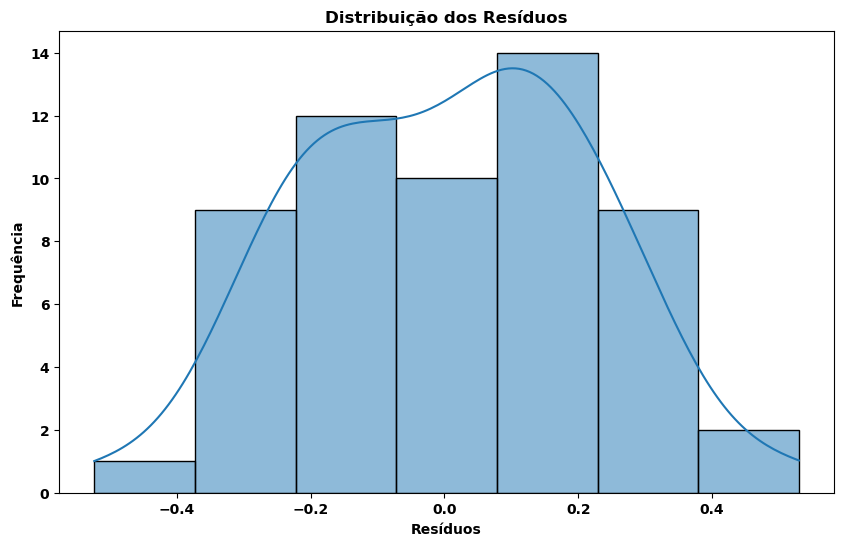

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predizer no conjunto de teste
y_pred_test = best_model.predict(X_test)

# Calcular e plotar os resíduos
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')
plt.show()

# Analisar a importância das features (para modelos de árvore, por exemplo)
if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    features = X_train.columns
    importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importances_df = importances_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importances_df)
    plt.title('Importância das Features')
    plt.show()